In [39]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
deg = np.radians(np.array([15, 25, 35, 45, 55, 65, 75]))
degerr = np.radians(1)
y = np.array([.65, 1.05, 1.34, 1.40, 1.45, 1.20, 0.83])
yerr = .05
y_adj = y / np.cos(deg)
yerr_adj = np.sqrt(((y*np.sin(deg)/np.cos(deg)**2)*degerr)**2+(yerr/np.cos(deg))**2)

t = 1.92 
terr = .05

def get_n(deg, y, t):
    return (2 * np.sin(deg) * np.sqrt(t ** 2 + 0.25 * y ** 2)) / y

def get_z(deg, n):
    return np.sin(deg) / n

def get_x(deg):
    return np.sin(deg)

def get_zerr(y, yerr, t, terr):
    f1 = t / (2 * (y ** 2 / 4 + t ** 2) ** (3/2))
    f2 = np.sqrt(t**2 * terr + y**2 * yerr)
    return f1 * f2

def get_xerr(deg, degerr):
    return degerr * np.sin(deg)

def get_nerr(x, xerr, z, zerr):
    return x/z * np.sqrt((xerr/x)**2+(zerr/z)**2)


In [28]:
n = get_n(deg, y_adj, 1.92)

x = get_x(deg)

z = get_z(deg, n)

xerr = get_xerr(deg, degerr)

zerr = get_zerr(y_adj, yerr_adj, t, terr)

nerr = get_nerr(x, xerr, z, zerr)


In [29]:
n

array([1.49942958, 1.46313169, 1.46350636, 1.54298941, 1.48971453,
       1.52435674, 1.50691658])

In [30]:
nerr

array([0.51393629, 0.30814215, 0.23676336, 0.22671246, 0.20159934,
       0.22052391, 0.25564093])

In [31]:
yerr_adj

array([0.05185938, 0.05596885, 0.06422916, 0.07870261, 0.10756209,
       0.15903458, 0.28452303])

In [32]:
np.average(n)

1.4985778413925837

In [33]:
np.mean(n)

1.4985778413925837

In [52]:
stderr = np.std(n) / np.sqrt(len(n))

In [53]:
y_adj

array([0.67292952, 1.15854681, 1.63583795, 1.97989899, 2.52799785,
       2.8394419 , 3.20687374])

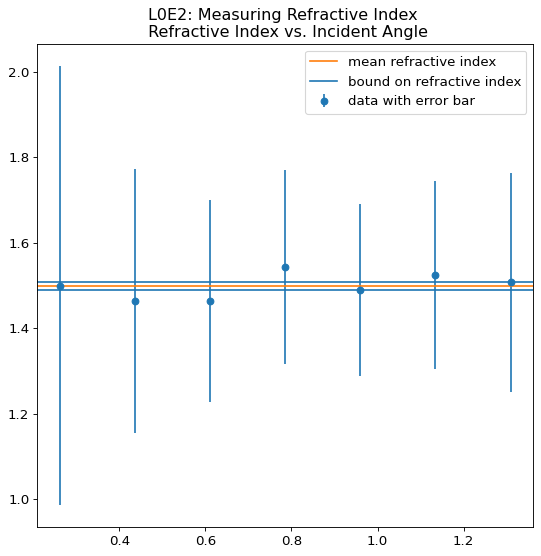

In [58]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(deg, n, yerr=nerr, label="data with error bar", fmt='o')
x_space = np.linspace(deg[0],deg[-1])
plt.axhline(np.mean(n), label='mean refractive index', color='tab:orange')
plt.axhline(np.mean(n) + stderr, label='bound on refractive index', color='tab:blue')
plt.axhline(np.mean(n) - stderr, color='tab:blue')
plt.title("L0E2: Measuring Refractive Index \n Refractive Index vs. Incident Angle")

plt.legend()
plt.show()